In [1]:
import utils,os
import importlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import gr_fitted
import pyperplot as ppp
import settings
import warnings
warnings.filterwarnings("ignore")
mk=ppp.Marker('fig.yml')
aa=np.asarray
%matplotlib inline

In [2]:
folder='subj_csv_data'

subjects=['s01','s02','s03','s06','s08','s09','s10','s12','s13','s15']
len_subjects=len(subjects)
def reload(postfix=""):
    global ads,fitteds
    importlib.reload(utils)
    ads=[utils.AnalysisData(folder,subject) for subject in subjects]
    
    fitteds=[
        np.load(f"connect/data{postfix}/{subject}.npy",allow_pickle=True).tolist()
        for subject in subjects]
reload()

# Figure S1

figure used in paper is stored in paper_figs/supp/fig1/fig1.svg


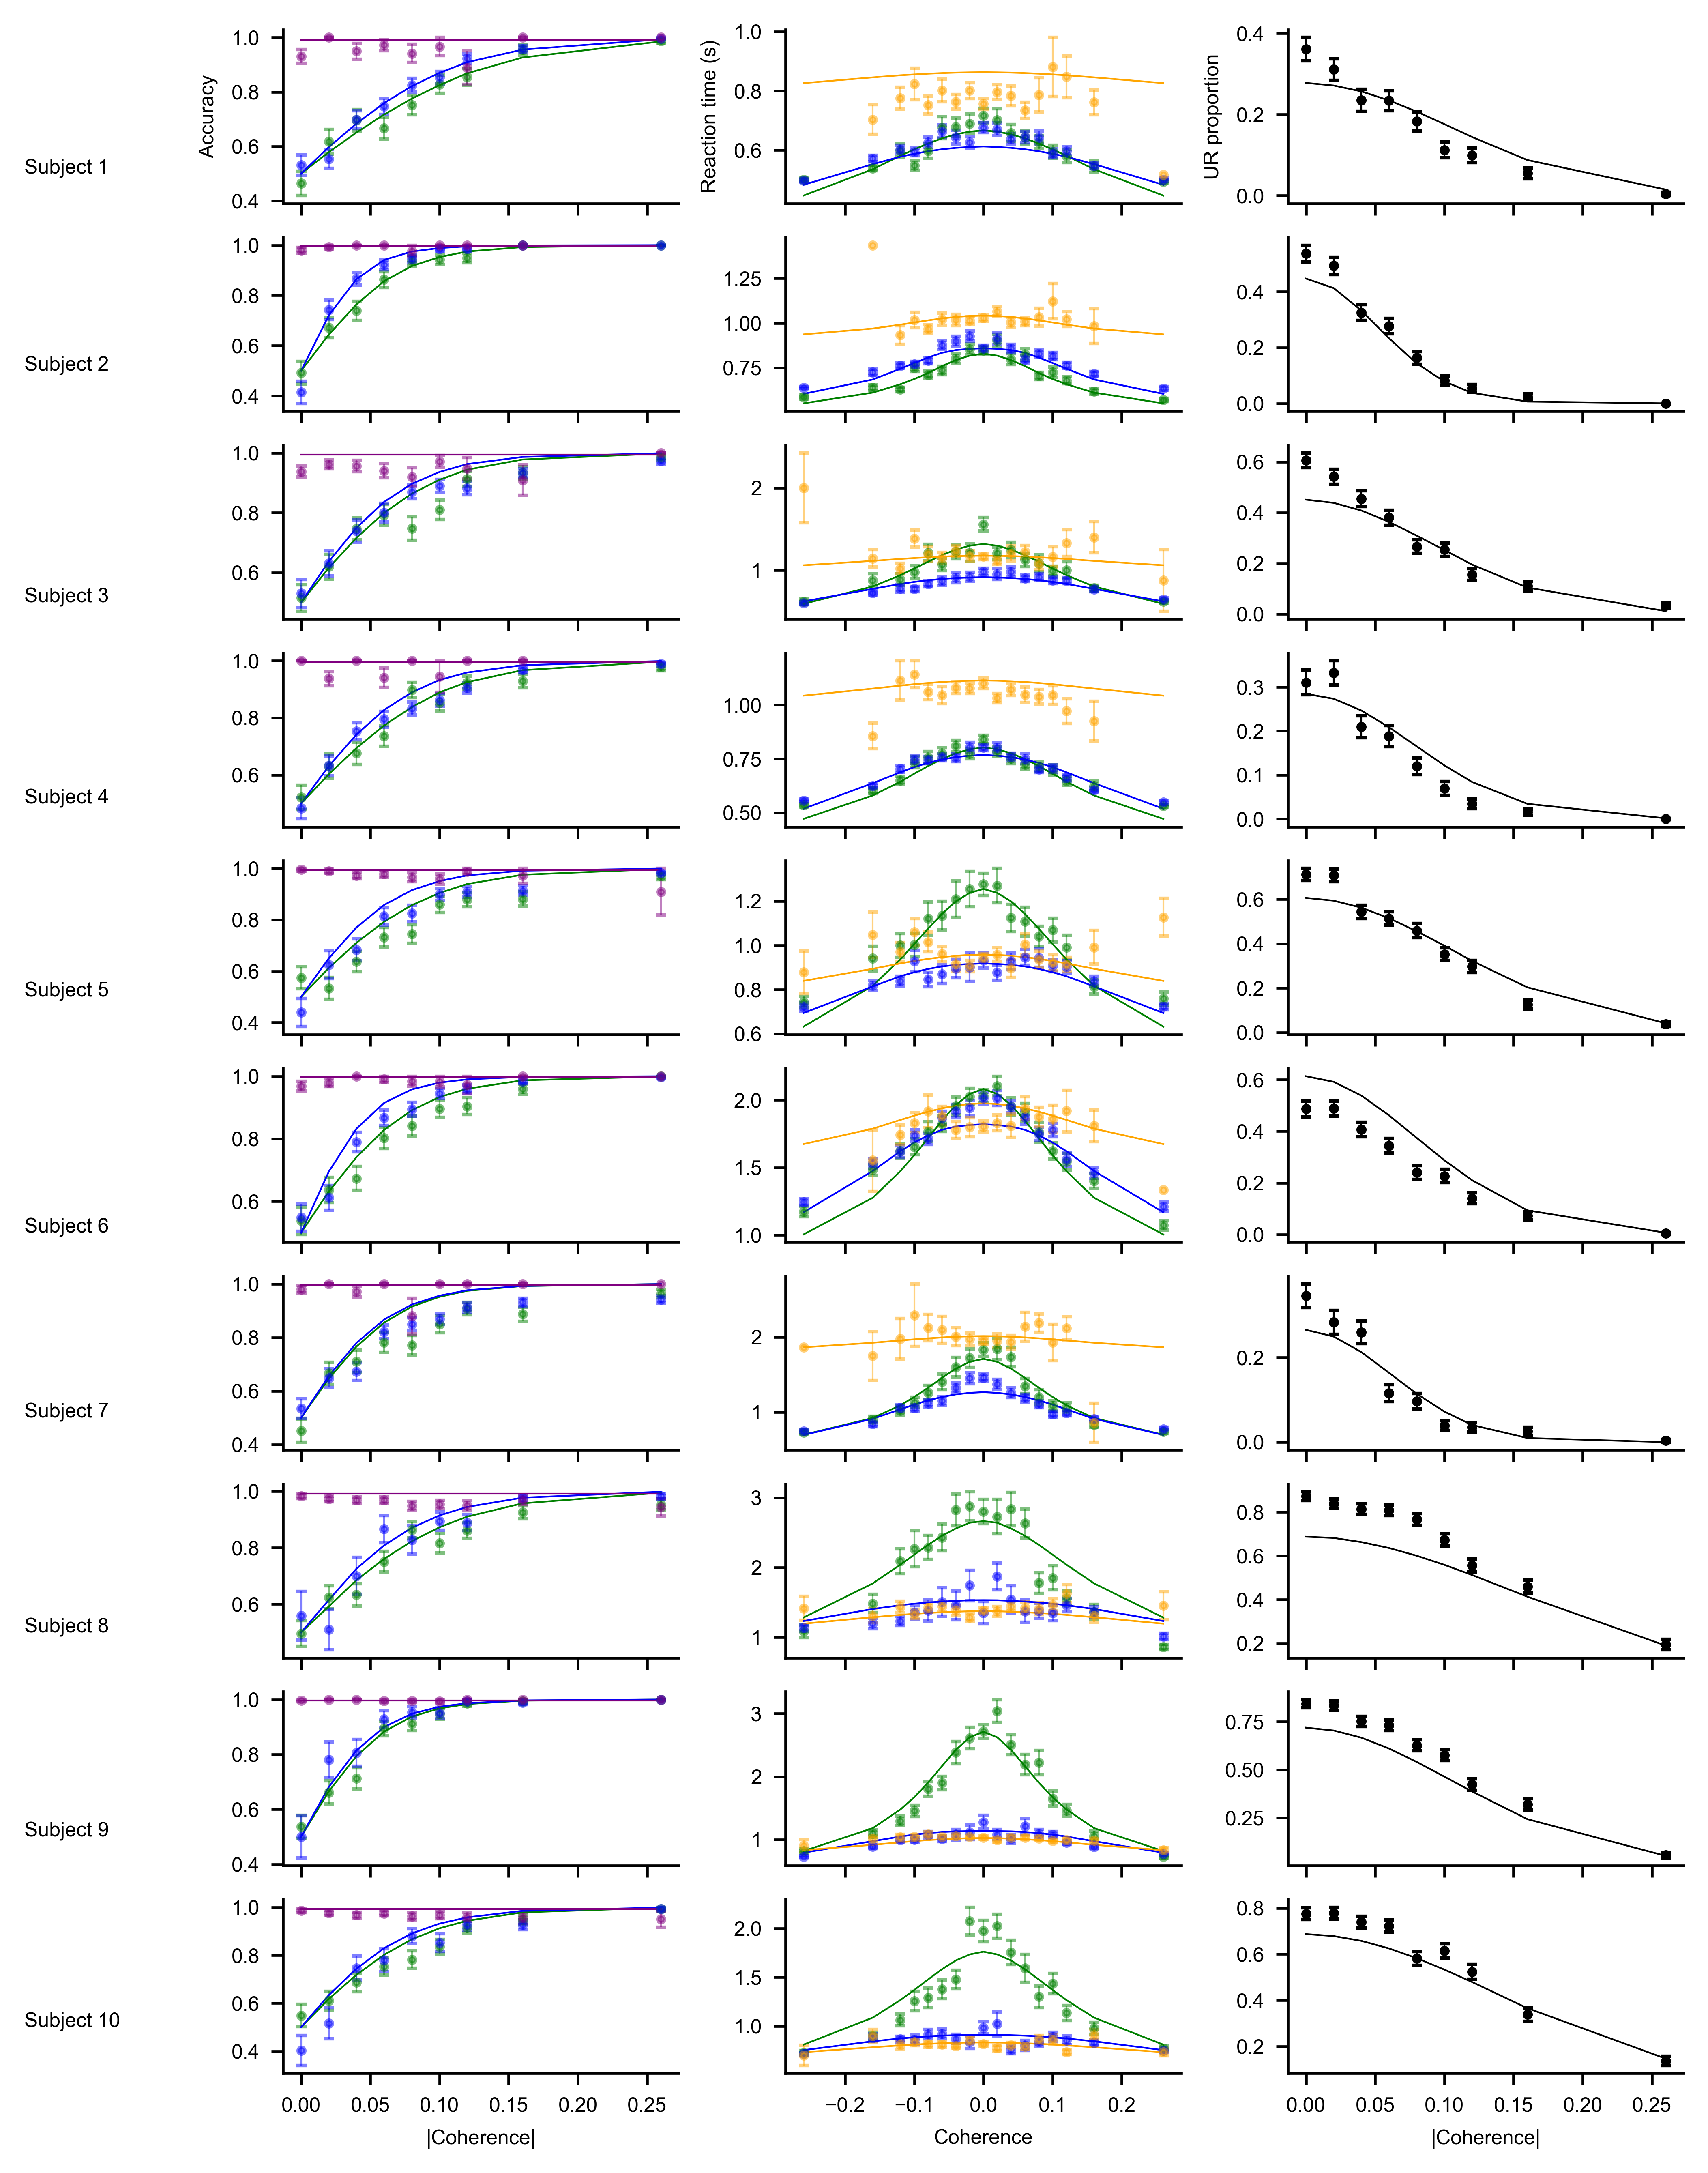

In [3]:
# three to one
fs=6
with ppp.SF('all_3to1',"figs/all",mk,style='neuron-multiplot',nrows=len(ads),ncols=3,figsize=(7,9),dpi=600) as (fig,axes):
    for i,ad in enumerate(ads):
        ad.plot_proportion(ax=axes[i,0],
            data=['no-up lr','opt-up lr','opt-up up'],
            prop_types=['correct'],errorbar=True,dirc=False,comparable=True)
        gr_fitted(axes[i,0],fitteds[i]['accuracy'])
        axes[i,0].text(-0.2,0.5,f"Subject {i+1}",fontsize=fs)
        if i==len(ads)-1:
            axes[i,0].set_xlabel('|Coherence|',fontsize=fs)
            axes[i,1].set_xlabel('Coherence',fontsize=fs)
            axes[i,2].set_xlabel('|Coherence|',fontsize=fs)
        elif i==0:
            # utils.axSet(axes[i,0],ylabel='Accuarcy',legend=False)
            # utils.axSet(axes[i,1],ylabel='Reaction time (s)',legend=False)
            # utils.axSet(axes[i,2],ylabel='UR proportion',legend=False)
            axes[i,0].set_ylabel('Accuracy',fontsize=fs)
            axes[i,1].set_ylabel('Reaction time (s)',fontsize=fs)
            axes[i,2].set_ylabel('UR proportion',fontsize=fs)
        if i!=len(ads)-1:
            for j in range(3):
                plt.setp(axes[i,j].get_xticklabels(), visible=False)
          
        ad.plot_responseTime(ax=axes[i,1],
            data=['no-up lr','opt-up lr','opt-up up'],
            with_scatter=False,method='errorbar',dirc=True)
        gr_fitted(axes[i,1],fitteds[i]['rt'])
        ad.plot_proportion(ax=axes[i,2],
            data=['opt-up'],prop_types=['up'],errorbar=True,dirc=False,alpha=1)
        gr_fitted(axes[i,2],fitteds[i]['ur_prop'])
    plt.tight_layout()

# Figure S2A

In [4]:

from functools import wraps
def subjectsPlotDecorator(**f_kwargs):
    def decorator(func):
        @wraps(func)
        def wrapper(*args,save_name=None,style='neuron-multiplot',**kwargs):
            folder_names="figs/all"
            nrows=f_kwargs['nrows']
            ncols=f_kwargs['ncols']
            with ppp.SF(save_name,folder_names,mk,style=style,**f_kwargs) as (fig,axes):
                for ij,ad in enumerate(ads):
                    i,j=ij//ncols,ij%ncols
                    if i==0 and j==0:
                        func(*args,**kwargs,
                            ad=ad,fig=fig,ax=axes[i,j],fitted=fitteds[ij],setfig=True)
                    else:
                        func(*args,**kwargs,
                            ad=ad,fig=fig,ax=axes[i,j],fitted=fitteds[ij])
                for nij in range(ij+1,nrows*ncols):
                    i,j=nij//ncols,nij%ncols
                    fig.delaxes(axes[i,j]) # remove extra plot
        return wrapper
    return decorator
extra_options={'legend':{'bbox_to_anchor':(1,1)}}
@subjectsPlotDecorator(sharex=True,sharey=False,figsize=(7,3),nrows=3,ncols=4)
def plotGroup_rtCohFit(data,*args,ad=None,fig=None,ax=None,fitted=None,setfig=False,**kwargs):
    ad.plot_rtCohFit(ax,data,*args,**kwargs)
    utils.axSet(ax,legend=False)
    if setfig:
        utils.figSet(fig,ax,title="Reaction time and Coherences Fit",xlabel="|Coherence|",ylabel="Reaction time (s)",
                legend=[settings.label_map[d] for d in data],extra_options=extra_options)
@subjectsPlotDecorator(sharex=True,sharey=True,figsize=(7,3),nrows=3,ncols=4)
def plotGroup_rtAcc(data,*args,ad=None,fig=None,ax=None,fitted=None,setfig=False,**kwargs):
    ad.plot_rtAcc(ax,data,*args,**kwargs)
    if fitted is not None: gr_fitted(ax,fitted['acc_quantile'])
    utils.axSet(ax,legend=False,xticks=[0,1,2,3,4])
    if setfig:
        utils.figSet(fig,ax,title="UR proportion",xlabel="Reaction time quintile",ylabel="Accuracy",legend=None,extra_options=extra_options)
@subjectsPlotDecorator(sharex=True,sharey=False,figsize=(4,3),nrows=4,ncols=3)
def plotGroup_responseTimeEB(data,*args,ad=None,fig=None,ax=None,fitted=None,setfig=False,**kwargs):
    ad.plot_responseTime(ax,data,*args,**kwargs)
    if fitted is not None: 
        dk={f'y_{d}':fitted['rt'][f'y_{d}'] for d in data}
        dk['x']=fitted['rt']['x']
        gr_fitted(ax,dk)
    utils.axSet(ax,legend=False)
    xlim=(ad.dircohs[0],ad.dircohs[-1]) if kwargs['dirc'] else (ad.cohs[0],ad.cohs[-1])
    if setfig:
        utils.figSet(fig,ax,xlim=xlim,
            title="Reaction time and Coherence",xlabel="Coherence",ylabel="Reaction time (s)",
            legend=[settings.label_map[d] for d in data],extra_options=extra_options)

figs/all/all_rtCohFit_opt_up.svg figs/all/all_rtCohFit_opt_up.svg
figure used in paper is stored in paper_figs/supp/fig2/A.svg


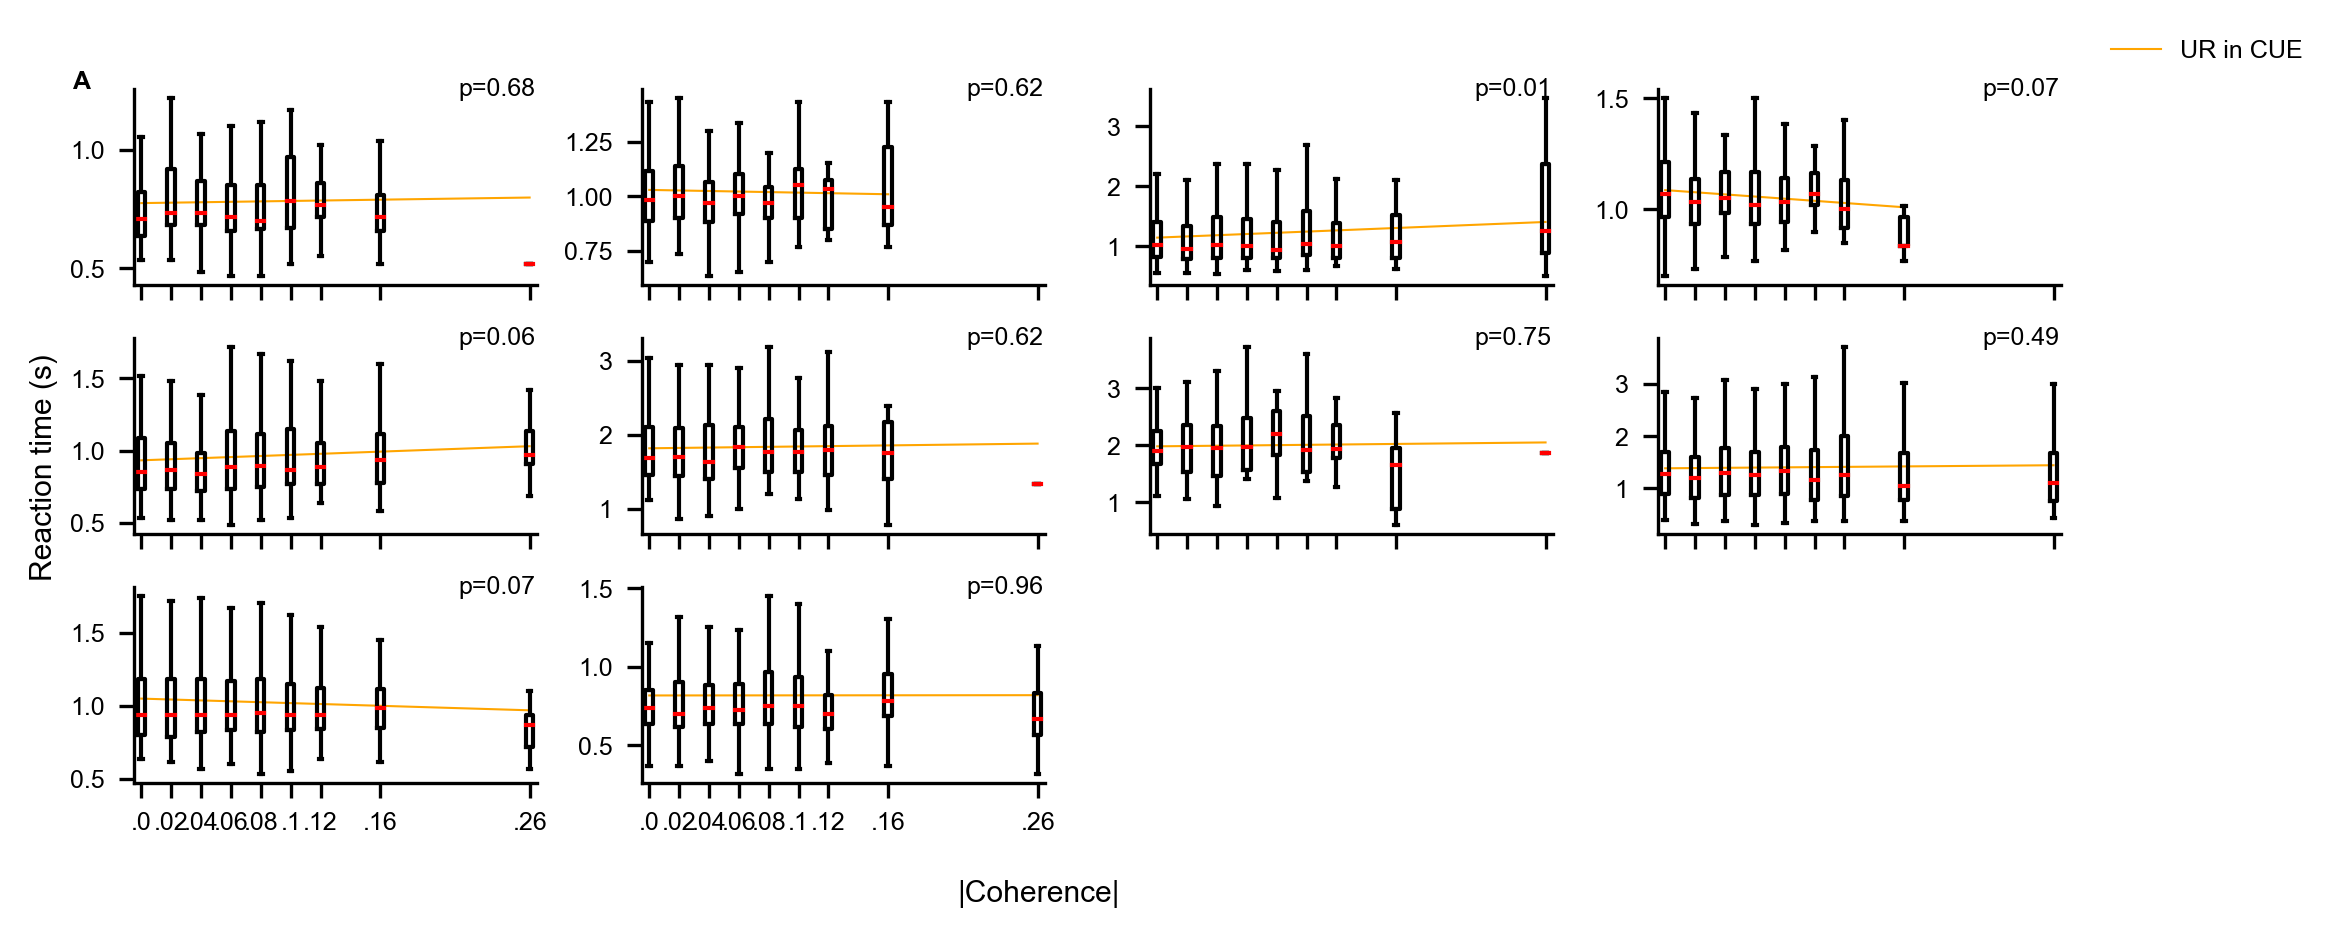

In [5]:
plotGroup_rtCohFit(data=['opt-up up'],box=True,save_name="all_rtCohFit_opt_up",remove_up026=False)

# Figure S2B

figs/all/all_rtAcc.svg figs/all/all_rtAcc.svg
figure used in paper is stored in paper_figs/supp/fig2/B.svg


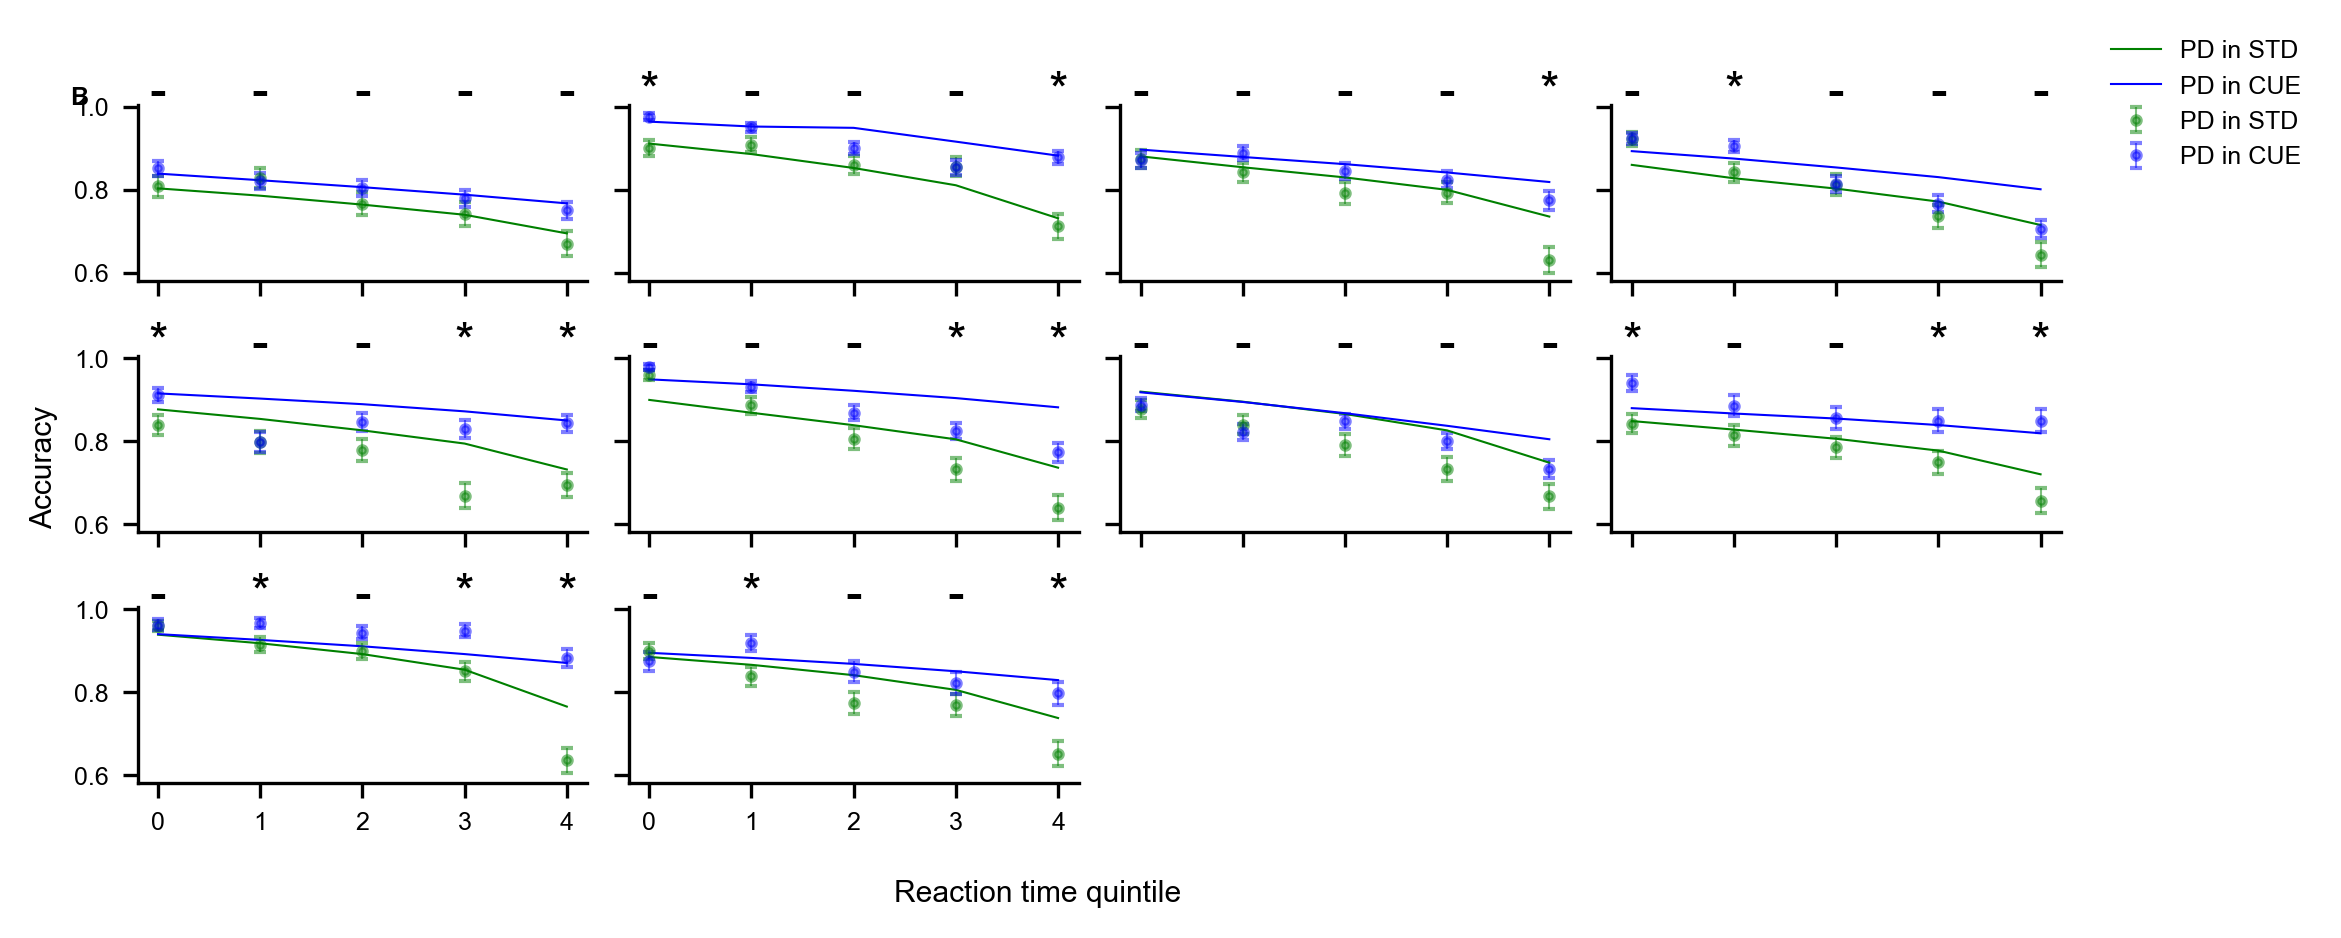

In [6]:
plotGroup_rtAcc(data=['no-up lr','opt-up lr'],stat=True,save_name="all_rtAcc",joinline=False,mc=True)

# Figure S6C

figs/all/all_responseTimeCoh_opt_tt.svg figs/all/all_responseTimeCoh_opt_tt.svg
figure used in paper is stored in paper_figs/supp/fig6/C.svg


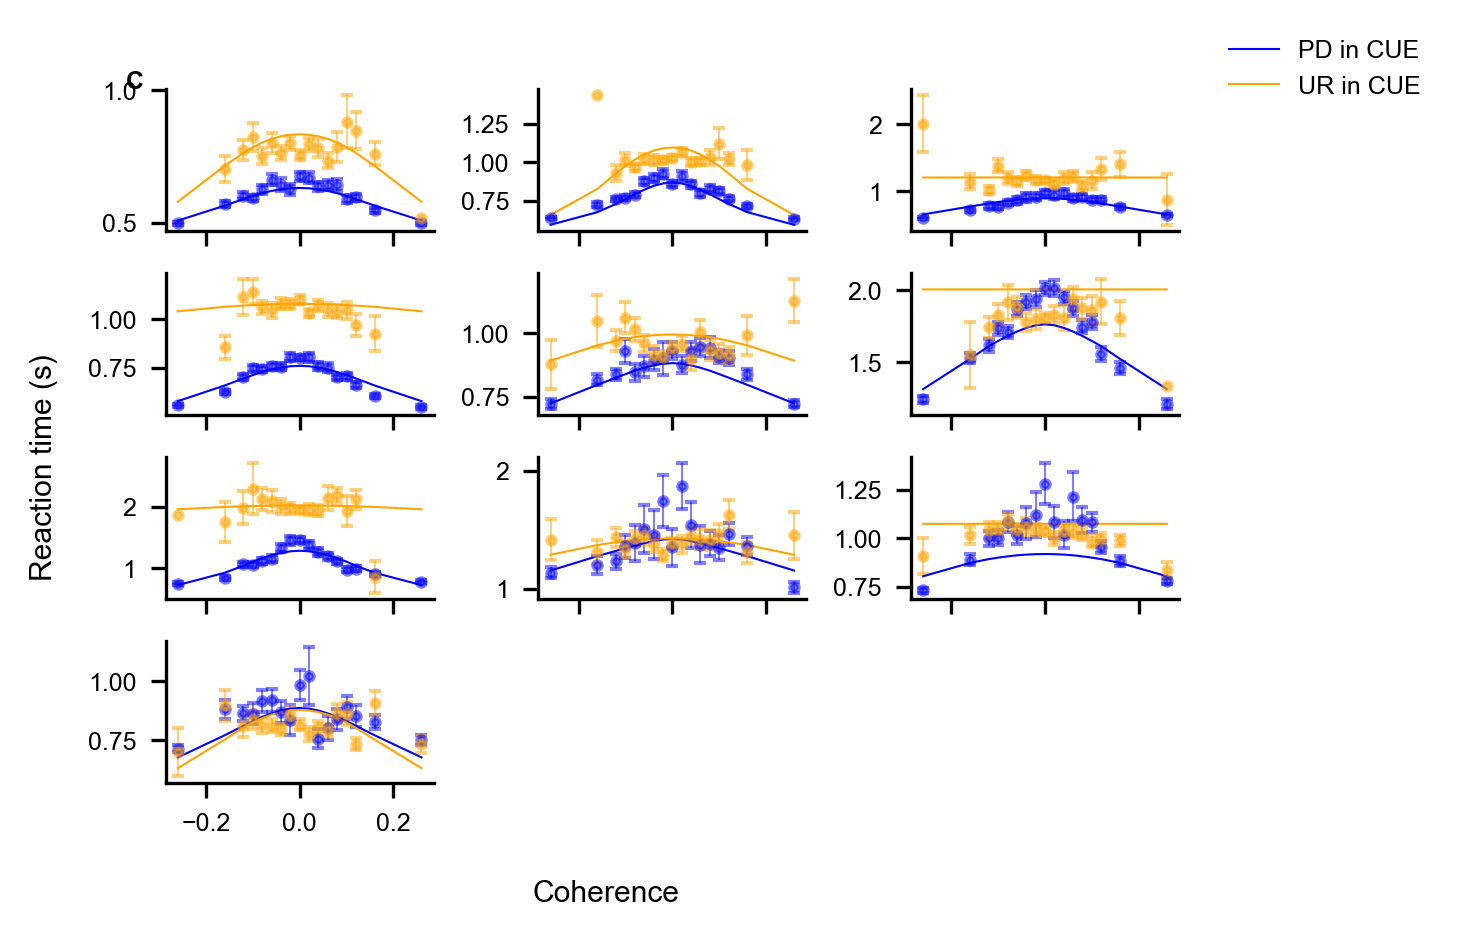

In [7]:
reload("_tt")
plotGroup_responseTimeEB(data=['opt-up lr','opt-up up'],
    method='errorbar',dirc=True,remove_up026=False,
    save_name=f"all_responseTimeCoh_opt_tt")

# Figure S6D

figs/all/all_responseTimeCoh_opt_2d3b.svg figs/all/all_responseTimeCoh_opt_2d3b.svg
figure used in paper is stored in paper_figs/supp/fig6/D.svg


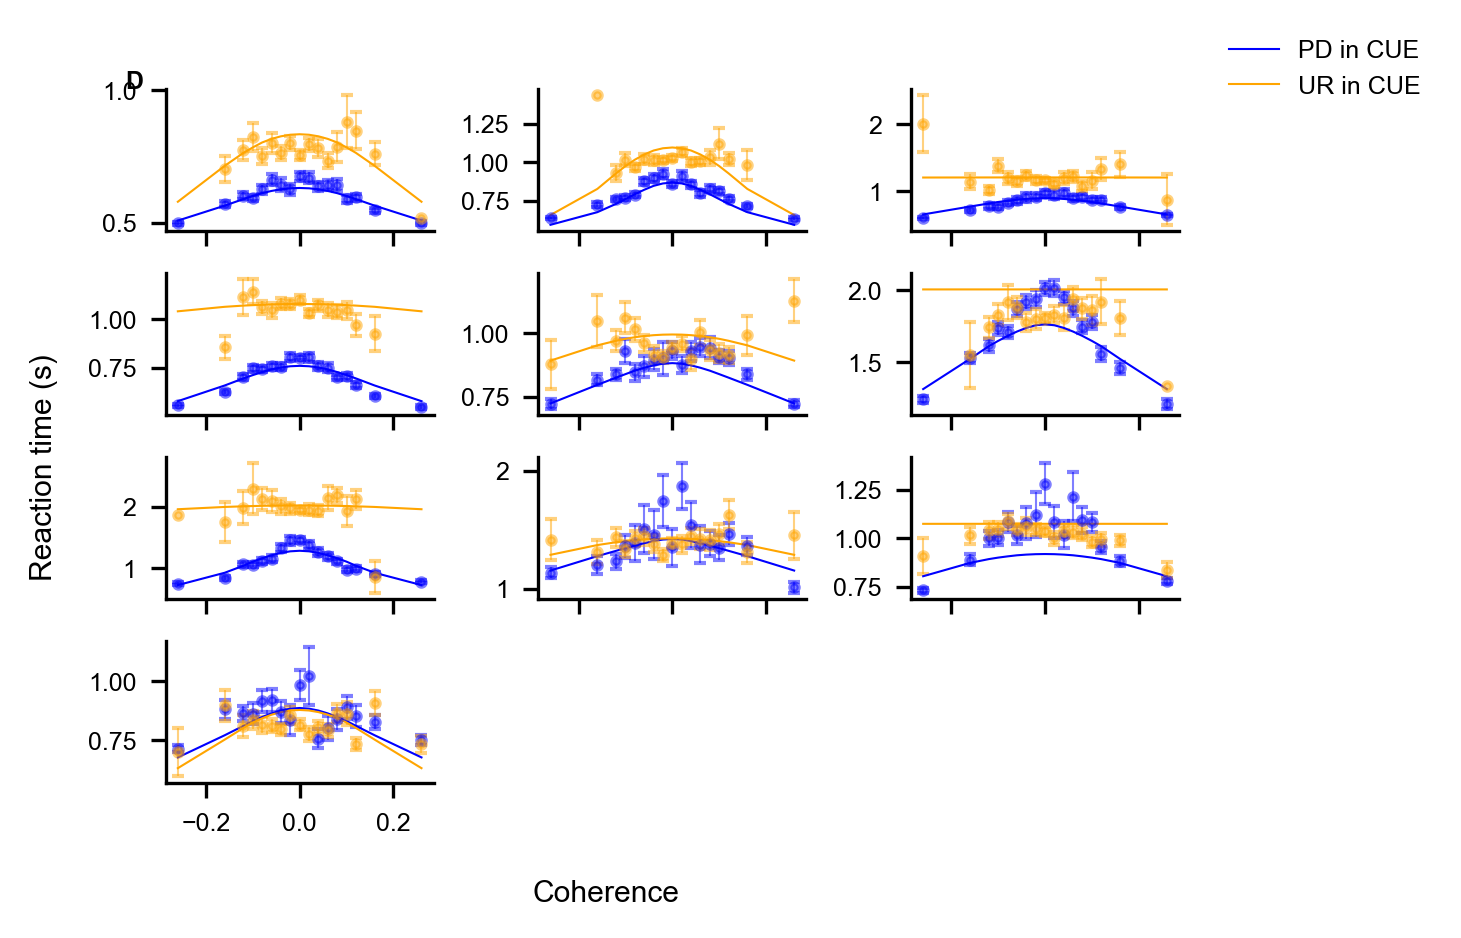

In [8]:
reload("_tt")
plotGroup_responseTimeEB(data=['opt-up lr','opt-up up'],
    method='errorbar',dirc=True,remove_up026=False,
    save_name=f"all_responseTimeCoh_opt_2d3b")